In [1]:
                           #Linear Regression Project Using Scikit-Learn
                           # Project on how advertising medium affects sales of Product 
                           # adversing Source: TV Radio and Newspaper 
                           # Analyse on which adversing Source, sales are more dependent
                
  #importing all important libraries              
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#loading of data file
df=pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
#display only top of some data
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


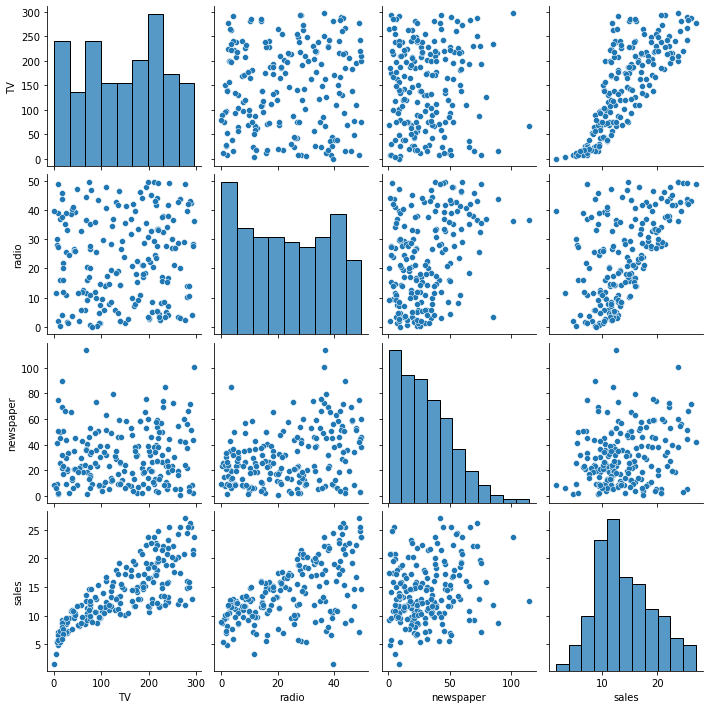

In [5]:
# show pair plot
sns.pairplot(df)

In [7]:
# from last result graph between sales &TV  ,sales &radio , sales &newspaper (last row graph from above)
# we can analyse sales has apporiximate linear relation with TV and radio but with newspaper there is no such pattern
# this is only graph analysation let's proceed analysing and predicting model with the help of Scikit-Learn library

   ##  Use of Scikit-Learn  ##
    
    

#Separation of Features(X) 0r independent variable and Labels (Y) or dependent Variable

X=df.drop('sales', axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [14]:
# labels
y=df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [16]:
#separate train and test
from sklearn.model_selection import train_test_split
#help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
X_train

,TV,radio,newspaper
154,187.8,21.1,9.5
114,78.2,46.8,34.5
118,125.7,36.9,79.2
64,131.1,42.8,28.9
165,234.5,3.4,84.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [17]:
# creation of Model
# I am taking linear model Here and will analyse how much it is valid model for this dataset
from sklearn.linear_model import LinearRegression

In [18]:
model=LinearRegression()              #imported Linear model

In [19]:
#creation of data 
#passing train data to model
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# predict labels for test data
test_predictions=model.predict(X_test)
test_predictions                              ## predicted value for labels for test features 

array([15.64343813, 19.58078283, 11.42717781, 16.90494334,  9.17645232,
        7.01921001, 20.24548588, 17.27288092,  9.81362002, 19.15221858,
       12.36281849, 13.90086335, 13.74679921, 21.16322282, 18.31876004,
        9.96472602, 15.56312703,  7.73452007,  7.57314037, 20.32745421,
        7.79414911, 18.16308067, 24.57041484, 22.71055089,  8.01558318,
       12.65730219, 21.43661308,  8.04499619, 12.43159447, 12.40259255,
       10.70029092, 19.16776811, 10.10150532,  6.69083331, 17.24889776,
        7.79224406,  9.25952001,  8.31516806, 10.51963092, 10.67086792,
       12.88094679,  9.79344981, 10.20060813,  8.013982  , 11.54267429,
       10.07800983,  8.98583386, 16.21285502, 13.20750313, 20.70094692,
       12.42670309, 13.96572233, 17.55475937, 11.15936616, 12.58108647,
        5.54230087, 23.22486082, 12.58536565, 18.76366836, 15.15376302,
       15.15931391, 23.91773675,  6.78191588, 19.84529505, 13.86858162,
       21.07676645])

In [24]:
         ## Comparision between predicted value and y_test and Error evaluation.##

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
df['sales'].mean()

14.022500000000003

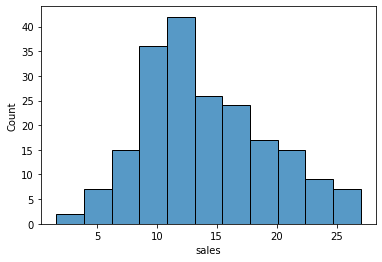

In [27]:
sns.histplot(data=df,x='sales');

In [28]:
  # MAE # mean absolute error
    
mean_absolute_error(y_test, test_predictions)

1.236918849425931

In [29]:
  ## MSE ##  mean square Error

mean_squared_error(y_test,test_predictions)

2.3483752427138267

In [30]:
 ## RMSE ##  root mean square error
    
np.sqrt(mean_squared_error(y_test, test_predictions))

1.5324409426512418

In [31]:
   ## Residual finding ##   residual is the deviation between our predicted value from model and actual test value 

test_residuals=y_test- test_predictions
test_residuals

37    -0.943438
109    0.219217
31     0.472822
89    -0.204943
66     0.323548
         ...   
183    2.282263
127    2.018084
53     1.354705
100   -2.168582
93     1.123234
Name: sales, Length: 66, dtype: float64

<AxesSubplot:xlabel='sales', ylabel='sales'>

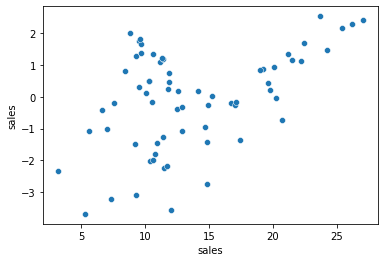

In [32]:
  ## residual plot ##

sns.scatterplot(x=y_test ,y=test_residuals)

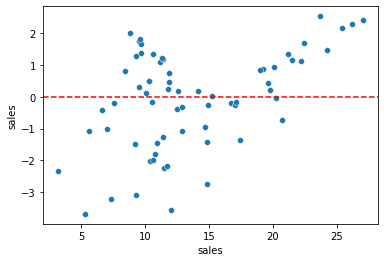

In [34]:
## after analysing residual plot we can see that all the data are randon Hence this model is pretty good
sns.scatterplot(x=y_test ,y=test_residuals)
plt.axhline(y=0, color='r',ls='--')

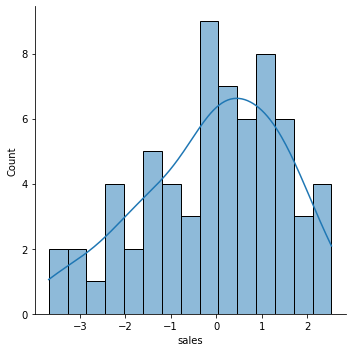

In [36]:
## normal distribution of residual ##
sns.displot(test_residuals,bins=15, kde=True)

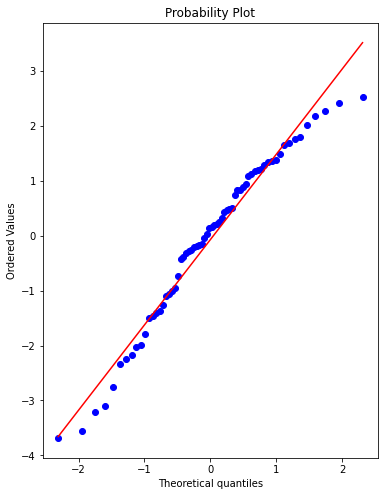

In [37]:
import scipy as sp
fig,ax=plt.subplots(figsize=(6,8))
fig,ax=sp.stats.probplot(test_residuals,plot=ax)

In [38]:
  ## Model Deployment ##

final_model=LinearRegression()

In [39]:
final_model.fit(X,y)

LinearRegression()

In [40]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [41]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [42]:
y_hat=final_model.predict(X)

In [43]:
y_hat

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995, 12.12295317,  3.72734086, 12.55084872,
        7.0322992 , 17.28512918, 10.57712073,  8.82630048, 18.43436638,
       20.81929952, 12.82365674, 23.22495716,  9.95168206, 14.16607293,
       18.10076728, 14.7405382 ,  6.4891503 , 16.5459329 ,  8.14651887,
       15.6100386 , 14.98951429, 17.05167344, 19.41053803,  9.14402389,
       21.6339338 , 11.3460929 ,  7.63888314, 18.86426829,  7.57483051,
       17.00682618, 23.40590052, 15.62347779,  9.90868103, 20.44761039,
       16.37766467, 17.2959832 , 21.59580326, 13.96385684,  8.88787996,
       15.16152314,  8.87338673, 21.7226299 , 16.26362018,  8.1681656 ,
       12.63121132,  9.33981296, 20.66297563, 19.94469957, 20.37443008,
       21.2926106 ,  8.52771254, 12.77458802, 21.89805198, 18.13348698,
        5.74215558, 22.89067208, 16.78426073, 13.21069202, 16.97773556,
        7.84904532,  9.01603163, 12.0370073 , 18.97657924, 21.10

In [44]:
## for deploying the model in real world ##

from joblib import dump,load

In [45]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [47]:
loaded_model=load('final_sales_model.joblib')
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [48]:
X.shape

(200, 3)

In [49]:
## now model is deployed ##
## we can check for any value and this model will give the output##

#example
# 149 TV ,22 radio ,12 newspaper 
# sales??
campaign= [[149,22,12]]
loaded_model.predict(campaign)                      #will give value for sales#

array([13.893032])